# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For my project, I have chosen to work with the TMDb Movies dataset. This is a large dataset that stores information about most popular (and also less popular) movies such as popularity, budget, revenue, user votes and much more. The exact information provided by this dataset will be shown in more detail in the next section.

In [31]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In this project, I will be interesting to investigate the following questions that sound interesting to me:

- How popularity of movies varies across genres and across years?

**Why this question is interesting:** Such analysis is interesting for several reasons. For movie producers, it would be interesting to know of what genres people like most. It is also interesting to notice tendencies of popularity of a given genres from year to year. For instance, fantasy might popular currently, but we might notice a tendency to having less and less popularity from year to year, which might also by useful for movie producers planning to make a movie in the future.

- How the movie budget affects its revenue?

**Why this question is interesting:** This might give movie producers an insight of how budget might affect their revenue and whether it is worth spending more to have higher revenue.

- How the movie budget affects its popularity?

**Why this question is interesting:** This is also interesting to movie producer to have an insight whether their movie would be more popular if they spend more.

- Is there any correlation between the popularity of a movie and its revenue?

**Why this question is interesting:** One reason I thought of this analysis have something to do with illegal movie download. If very popular movies has lower revenue than less popular, this might indicate that most people do not pay for movies to see them. If the correlation is positive, this might reflect a more healthy tendency to seeing movies in cinema and buying them legally. 

By answering the above questions I would have considered three independent variables (genres, revenue, popularity) and three depedent variables (popularity, budget, revenue).

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [32]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Loading the csv file into a Pandas dataframe
tmdb_df = pd.read_csv("./tmdb-movies.csv")

# printing out some rows of the dataframe
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's check what columns we have along with their datatypes:

In [33]:
tmdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

I will investigate some anomalies and missing data in the following section about data clearning.


### Data Cleaning

Since this project is only about answering the suggested questions, I will go on and remove all columns that are not pertinent to my questions. This will make things clearer to display and read.

In [34]:
tmdb_df = tmdb_df.drop(['id', 'imdb_id', 'budget', 'revenue', 
                        'original_title', 'cast', 'homepage',
                        'director', 'tagline', 'keywords', 
                        'overview', 'runtime', 'production_companies',
                        'release_date', 'vote_count', 'vote_average'], axis = 1)
tmdb_df.head(20)

,popularity,genres,release_year,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,9.335014,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09
5,9.110700,Western|Drama|Adventure|Thriller,2015,1.241999e+08,4.903142e+08
6,8.654359,Science Fiction|Action|Thriller|Adventure,2015,1.425999e+08,4.053551e+08
7,7.667400,Drama|Adventure|Science Fiction,2015,9.935996e+07,5.477497e+08
8,7.404165,Family|Animation|Adventure|Comedy,2015,6.807997e+07,1.064192e+09
9,6.326804,Comedy|Animation|Family,2015,1.609999e+08,7.854116e+08


Let's now see how our numeric data are distributed:

In [35]:
tmdb_df.describe()

,popularity,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,12.812941,3.430616e+07,1.446325e+08
min,0.000065,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,2015.000000,4.250000e+08,2.827124e+09


We notice that both the budget and the revenue columns have many missing values (50% quantile's values are 0). This means that for many movies we miss informations about budget and revenue. I will exclude movies missing this information from my analysis in the following. 

Notice that in the 'genres' columns, there are mutliple values, let's split this column into multiple dummy columns:

In [36]:
dm = tmdb_df['genres'].str.get_dummies(sep='|')
dm.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Let's now concatenate these dummy colulmns to the original dataframe:

In [37]:
# concatenate the original dataframe with the dummy columns
tmdb_df = pd.concat([tmdb_df, dm], axis = 1)

# remove the original 'genres' columns since we replace it by the dummy columns
tmdb_df = tmdb_df.drop(['genres'], axis = 1)

tmdb_df.head()


,popularity,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,Comedy,Crime,Documentary,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,2015,1.379999e+08,1.392446e+09,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,2015,1.379999e+08,3.481613e+08,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,13.112507,2015,1.012000e+08,2.716190e+08,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,11.173104,2015,1.839999e+08,1.902723e+09,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9.335014,2015,1.747999e+08,1.385749e+09,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Now I am are ready to answer my questions:

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 - How popularity of movies varies across genres from year to year?

Notice that the dummy format of the genre columns is not directly adapted to plotting with pandas or seaborn. We need to melt these dummy columns into rows. One row per genre. Let's do it:

In [38]:
# apply melt to the original dataframe. This will melt the dummy columns for genre
tmdb_melt_df = pd.melt(tmdb_df, id_vars = ['popularity', 'release_year', 'budget_adj', 'revenue_adj'], var_name = 'genre', value_name = 'is_true')
tmdb_melt_df.head(10)

,popularity,release_year,budget_adj,revenue_adj,genre,is_true
0,32.985763,2015,1.379999e+08,1.392446e+09,Action,1
1,28.419936,2015,1.379999e+08,3.481613e+08,Action,1
2,13.112507,2015,1.012000e+08,2.716190e+08,Action,0
3,11.173104,2015,1.839999e+08,1.902723e+09,Action,1
4,9.335014,2015,1.747999e+08,1.385749e+09,Action,1
5,9.110700,2015,1.241999e+08,4.903142e+08,Action,0
6,8.654359,2015,1.425999e+08,4.053551e+08,Action,1
7,7.667400,2015,9.935996e+07,5.477497e+08,Action,0
8,7.404165,2015,6.807997e+07,1.064192e+09,Action,0
9,6.326804,2015,1.609999e+08,7.854116e+08,Action,0


Now let's remove all rows with the 'is_true' value of 0. Because such rows make no sense:

In [39]:
# keep only lines with 'is_true' equals one
tmdb_melt_df = tmdb_melt_df[tmdb_melt_df.is_true == 1]

# remove the 'is_true' columns
tmdb_melt_df = tmdb_melt_df.drop(['is_true'], axis = 1)

tmdb_melt_df.head(10)

,popularity,release_year,budget_adj,revenue_adj,genre
0,32.985763,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,2015,1.379999e+08,3.481613e+08,Action
3,11.173104,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,2015,1.747999e+08,1.385749e+09,Action
6,8.654359,2015,1.425999e+08,4.053551e+08,Action
10,6.200282,2015,2.253999e+08,8.102203e+08,Action
11,6.189369,2015,1.619199e+08,1.692686e+08,Action
13,5.984995,2015,8.095996e+07,2.241460e+08,Action
14,5.944927,2015,2.575999e+08,1.292632e+09,Action
16,5.749758,2015,4.415998e+07,2.997096e+08,Action


The dataframe is now ready for exploratory visualizations. Let's use Seaborn to create a barplot showing how mean popularity of movies varies with their genres regardless of the year.

/home/alan/.conda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


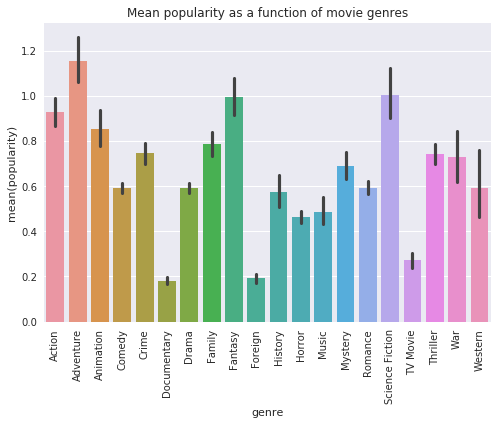

In [40]:
# use seaborn to create a barplot
ax = sns.barplot(x = 'genre', y = 'popularity', data = tmdb_melt_df)

# rotate the tick labels on the x axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# set the figure title
ax.set_title('Mean popularity as a function of movie genres')

plt.show()

Now let's plot the popularity as a function of genre per year.

/home/alan/.conda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


** Mean popularity as a function of movie genres and year **


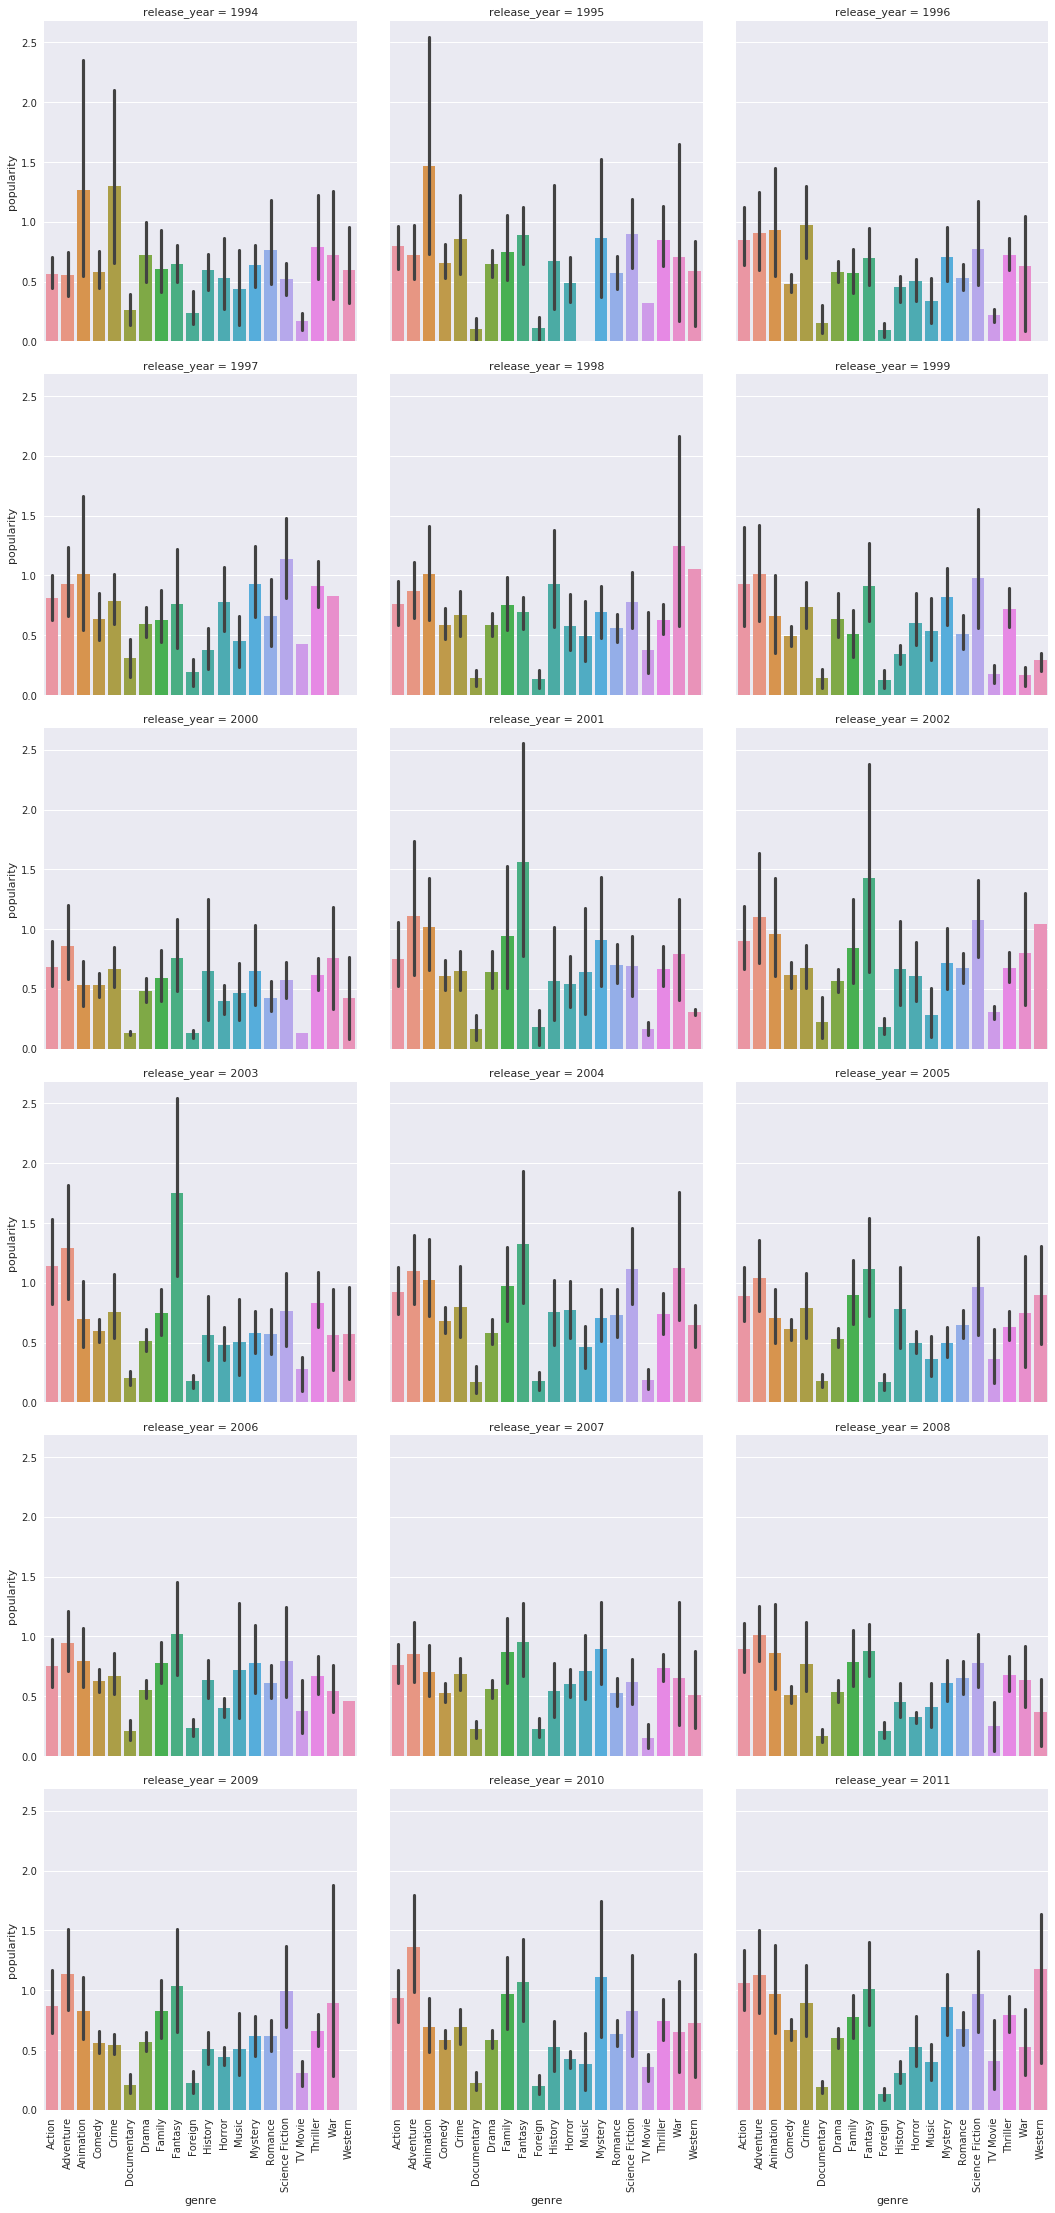

In [41]:
# subset the original dataframe by keeping only movies with release years betwen the 1st and 3rd quantiles
sub_df = tmdb_melt_df.query('release_year >= release_year.quantile(0.25) & release_year <= release_year.quantile(0.75)')

# create a factorplot with seaborn
g = sns.factorplot(x = 'genre', y = 'popularity', col="release_year", 
                   col_wrap=3, data=sub_df, 
                   kind="bar", size=5, aspect=1)
g.set_xticklabels(rotation=90)
print("** Mean popularity as a function of movie genres and year **")
plt.show()

From the above plots, we notice popularity per genre pattern are somewhat similar across the years inspite of some slight fluctutations of relative values. Adventure, Fantasy and Science Fiction movies are always among the most popular while Documentary and Foreign movies are among the less popular.

### Research Question 2  - How the movie budget affects its revenue?

This is an interesting question, are movies with higher budgets usually get higher revenue? Let's check this out. Notice that since many revenue and budget information are missing, I am going to only take values between the 25% and 95% percentiles.

/home/alan/.conda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


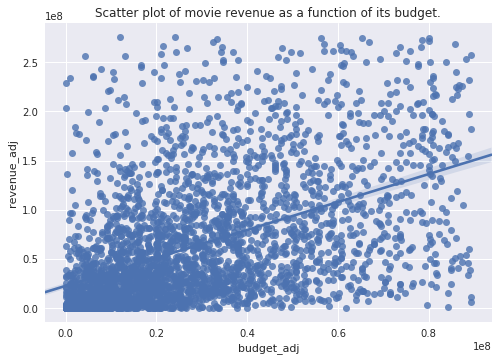

In [42]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
ax = sns.regplot(x = 'budget_adj', y = 'revenue_adj', data = tmdb_df.query('budget_adj > budget_adj.quantile(0.25) & \
                                                                            revenue_adj > revenue_adj.quantile(0.25) & \
                                                                            budget_adj <= budget_adj.quantile(0.95) & \
                                                                            revenue_adj <= revenue_adj.quantile(0.95)'))
ax.set_title("Scatter plot of movie revenue as a function of its budget.")

plt.show()

We notice that there is actually a positive correlation. Movies with higher budgets tend to have higher revenues.

### Research Question 3  - How the movie budget affects its popularity?

Another intersting question is whether movies with higher budgets are more popular.

/home/alan/.conda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


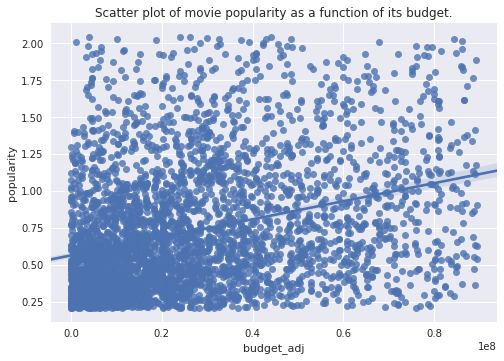

In [43]:
ax = sns.regplot(x = 'budget_adj', y = 'popularity', data = tmdb_df.query('budget_adj > budget_adj.quantile(0.25) & \
                                                                           popularity > popularity.quantile(0.25) & \
                                                                           budget_adj <= budget_adj.quantile(0.95) & \
                                                                           popularity <= popularity.quantile(0.95)'))

ax.set_title("Scatter plot of movie popularity as a function of its budget.")
plt.show()

Again, a positive correlation is found. Movies with higher budgets tend to be more popular.

### Research Question 4  - Is there any correlation between the popularity of a movie and its revenue?

It might sound intuitive that more popular movies get more ticket sales and thus more revenue. Let's check this out:

/home/alan/.conda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


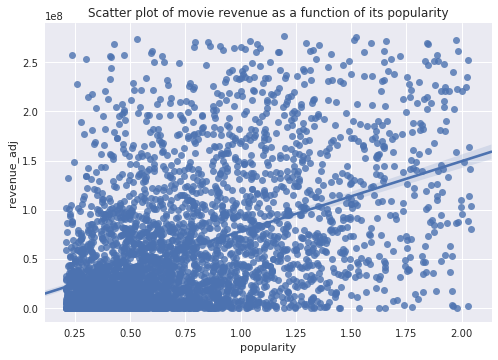

In [44]:
ax = sns.regplot(x = 'popularity', y = 'revenue_adj', data = tmdb_df.query('popularity > popularity.quantile(0.25) & \
                                                                            revenue_adj > revenue_adj.quantile(0.25) & \
                                                                            popularity <= popularity.quantile(0.95) & \
                                                                            revenue_adj <= revenue_adj.quantile(0.95)'))

ax.set_title("Scatter plot of movie revenue as a function of its popularity")

plt.show()

It seems to be actually the case, more popular movies tend to get high revenues.

<a id='conclusions'></a>
## Conclusions


Let me conclude by reflecting on the questions I have investigated in this report.


- How popularity of movies varies across genres and across years?

We notice that genres strongly influence popularity. The relative popularities per genres are also somewhat stable across the years. 

For each of the following three questions:

- How the movie budget affects its revenue?
    
- How the movie budget affects its popularity?

- Is there any correlation between the popularity of a movie and its revenue?

We notice that a positive correlation is found in each case.

By answering the above questions, I wanted to show the readers a clearer and a more formal explorations of what most people like about movie genres and how people across generation changed tastes regarding the same question. I also wanted to give a readers some insight of weather checking the movie budget before watching the movie could give them any hint of weather this movie would be a popular movie or not. Such information can be interesting for many curious people and I am glad to give some insight about them.

***Limitations:*** 

It is not clear from my analysis of the first question how genre combinations influence popularity. As we have seen, each movie has multiple genres, and it would be more interesting to see how genre combinations (Fantasy and Comedy together for instance) would affect popularity.

Regarding Q1, Q2 and Q3, we have seen that many revenue and budget information is missing. Given this, my analysis of the above questions might not reflect reality. It would be more interesting to repeat this analysis after recovering missiong budget and revenue information from other resources.


